<a href="https://colab.research.google.com/github/chjohnso-um/chjohnso-um-CSC-587/blob/main/Milestone_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Run XGBoost on the curated_log_data_bl.csv and create top30_xgboost_metabolites.csv

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Load your BL dataset
bl_data = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/curated_log_data_bl.csv')

# Prepare features and target
y = bl_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})
feature_cols = [col for col in bl_data.columns if col not in ['PARENT_SAMPLE_NAME', 'PPMI_CLINICAL_EVENT', 'PPMI_COHORT', 'CLIENT_IDENTIFIER']]
X = bl_data[feature_cols].apply(lambda col: col.fillna(col.median()), axis=0)

# Optional log transform of skewed features
skewness = X.skew()
highly_skewed = skewness[abs(skewness) > 2].index.tolist()
for feat in highly_skewed:
    X[feat] = np.log1p(X[feat] - X[feat].min() + 0.01)

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Run XGBoost
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    n_estimators=30,
    learning_rate=0.05,
    max_depth=3,
    reg_alpha=1.0,
    reg_lambda=1.0,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False
)
xgb_model.fit(X, y_encoded)

# Get top 30 features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_30_features = feature_importance.head(30)['Feature'].tolist()

# Export to CSV
X[top_30_features].to_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv', index=False)
print("Exported top 30 features to 'top30_xgboost_metabolites.csv'")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:06:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Exported top 30 features to 'top30_xgboost_metabolites.csv'


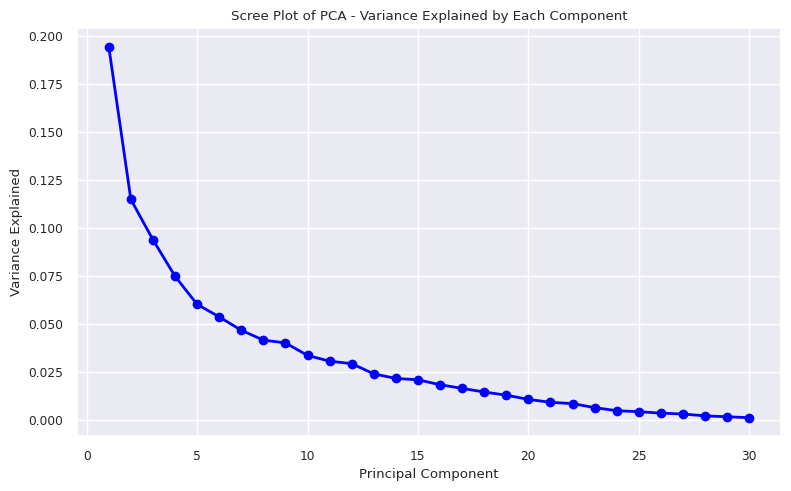

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already fit PCA:
pca = PCA().fit(X_scaled)   # If not done, run this on your scaled data

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot of PCA - Variance Explained by Each Component')
plt.grid(True)
plt.tight_layout()
plt.show()

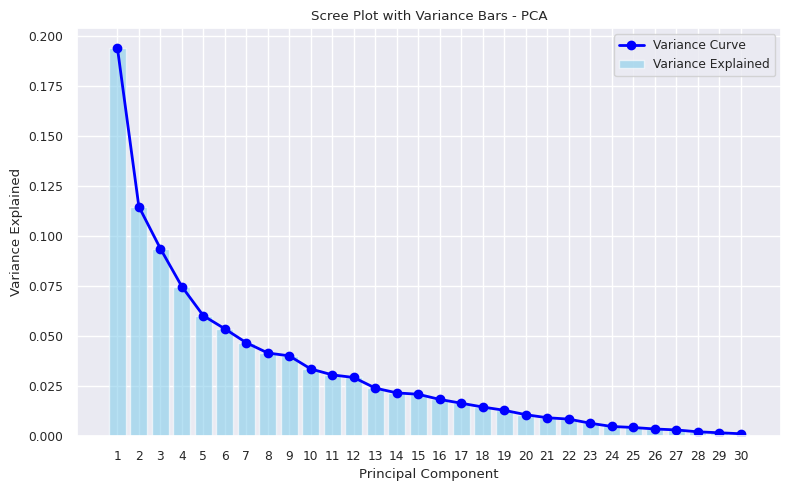

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming pca is already fitted on your data
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))

# ✅ Bar plot (variance explained by each component)
plt.bar(np.arange(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='skyblue', label='Variance Explained')

# ✅ Line plot over the bars for better visualization
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-', color='blue', label='Variance Curve', linewidth=2)

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot with Variance Bars - PCA')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

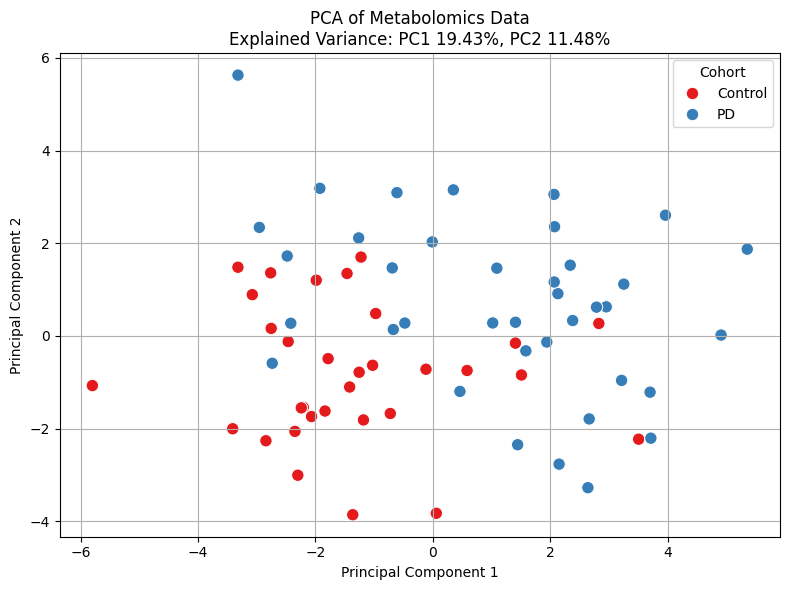

In [5]:
# Full PCA and Plotting Code for Top 30 XGBoost Metabolites

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Replace these with your actual DataFrame and label Series
X_bl = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv')  # e.g., bl_data[top_30_metabolite_columns]
y_bl = bl_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})      # e.g., bl_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})

# ✅ Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bl)

# ✅ Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# ✅ Create DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cohort'] = y_bl.map({0: 'Control', 1: 'PD'})  # Optional: Map numeric labels back to text

# ✅ Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cohort', palette='Set1', s=80)
plt.title(f'PCA of Metabolomics Data\nExplained Variance: PC1 {pca.explained_variance_ratio_[0]:.2%}, PC2 {pca.explained_variance_ratio_[1]:.2%}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Assuming X_bl (features) and y_bl (0/1 labels) are defined
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bl)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cohort'] = y_bl.map({0: 'Control', 1: 'PD'})  # Optional: for color labels

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


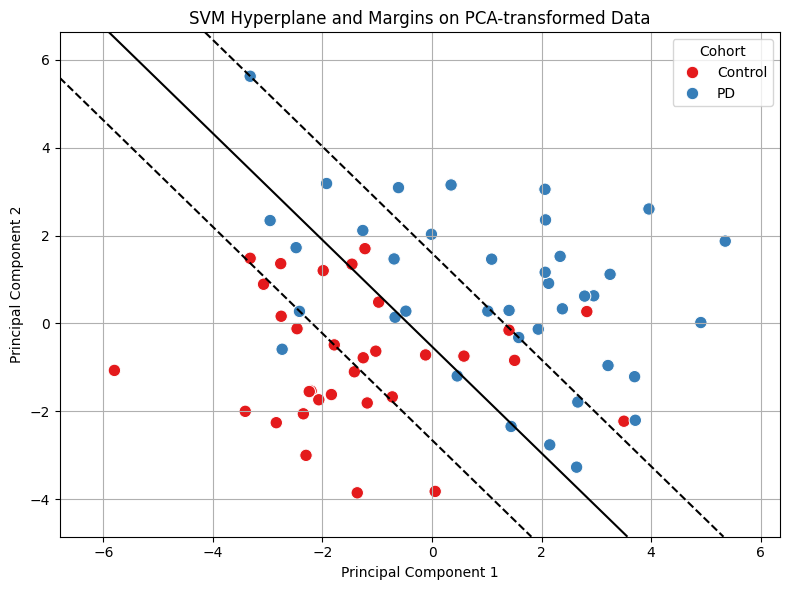

In [7]:
from sklearn.svm import SVC
import numpy as np

# Step 1: Train a linear SVM on the PCA-transformed data
svm_clf = SVC(kernel='linear', C=1.0)
svm_clf.fit(pca_df[['PC1', 'PC2']], y_bl)  # y_bl = 0/1 labels

# Step 2: Create a mesh grid to plot the decision boundary
xx, yy = np.meshgrid(
    np.linspace(pca_df['PC1'].min() - 1, pca_df['PC1'].max() + 1, 500),
    np.linspace(pca_df['PC2'].min() - 1, pca_df['PC2'].max() + 1, 500)
)
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 3: Plot the PCA points, SVM decision boundary, and margins
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cohort', palette='Set1', s=80)

# Plot decision boundary (hyperplane) and margins
plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='black')
plt.title('SVM Hyperplane and Margins on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cohort')
plt.grid(True)
plt.tight_layout()
plt.show()

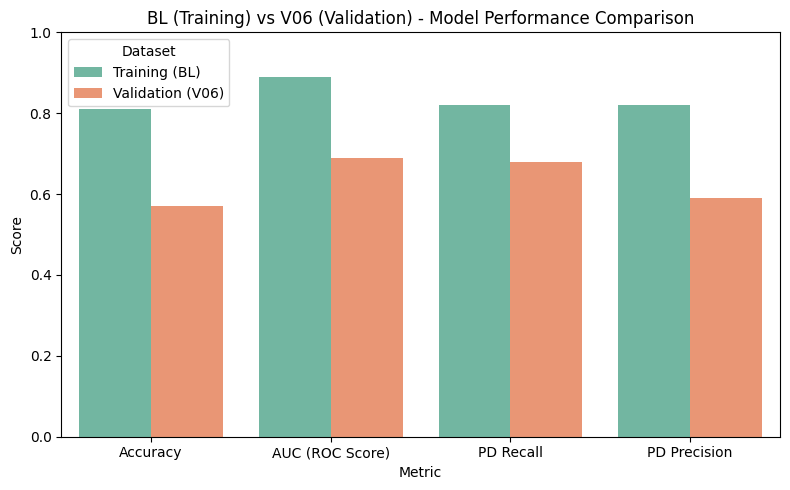

In [8]:
# Model performance comparison between BL and V06

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Re-create the comparison data
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC (ROC Score)', 'PD Recall', 'PD Precision'],
    'Training (BL)': [0.81, 0.89, 0.82, 0.82],
    'Validation (V06)': [0.57, 0.69, 0.68, 0.59]
})

# Melt for seaborn plotting
comparison_melted = comparison_df.melt(id_vars='Metric', var_name='Dataset', value_name='Score')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_melted, x='Metric', y='Score', hue='Dataset', palette='Set2')
plt.title('BL (Training) vs V06 (Validation) - Model Performance Comparison')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.tight_layout()

# Save or show the plot
plt.savefig('BL_vs_V06_Performance_Comparison.png', dpi=300)
plt.show()

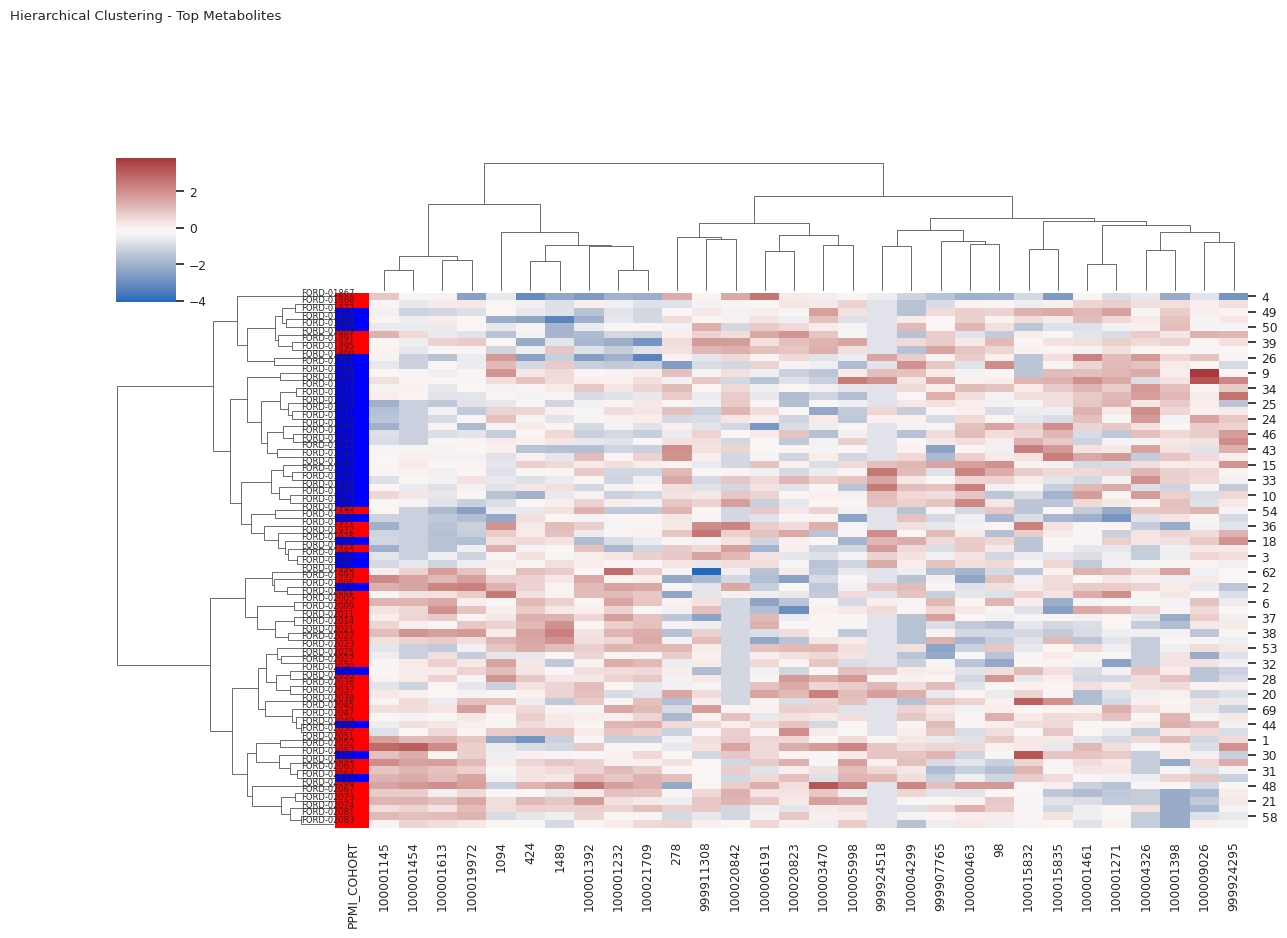

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ✅ Load your processed metabolite data
cluster_df = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv')

# ✅ Load the original dataset to grab sample labels and cohort info
bl_data = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/curated_log_data_bl.csv')
sample_labels = bl_data['PARENT_SAMPLE_NAME']  # Replace with your sample ID column name
y_bl = bl_data['PPMI_COHORT'].map({'PD': 1, 'Control': 0})

# ✅ Z-score normalization
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_df)
cluster_df_scaled = pd.DataFrame(cluster_data_scaled, columns=cluster_df.columns)

# ✅ Optional: Add patient labels (PD=red, Control=blue)
row_colors = y_bl.map({1: 'red', 0: 'blue'})  # Red = PD, Blue = Control

# ✅ Create clustermap with sample labels
sns.set(font_scale=0.8)
g = sns.clustermap(
    cluster_df_scaled,
    method='ward',
    metric='euclidean',
    row_colors=row_colors,
    figsize=(12, 8),
    cmap='vlag',
    dendrogram_ratio=(0.2, 0.2),
    cbar_pos=(0.02, 0.8, 0.05, 0.18)
)

# ✅ Add sample labels to y-axis (rows)
for idx, label in zip(range(len(sample_labels)), sample_labels):
    g.ax_heatmap.text(-0.5, idx, label, fontsize=6, va='center', ha='right')

plt.title('Hierarchical Clustering - Top Metabolites', pad=100)
plt.show()

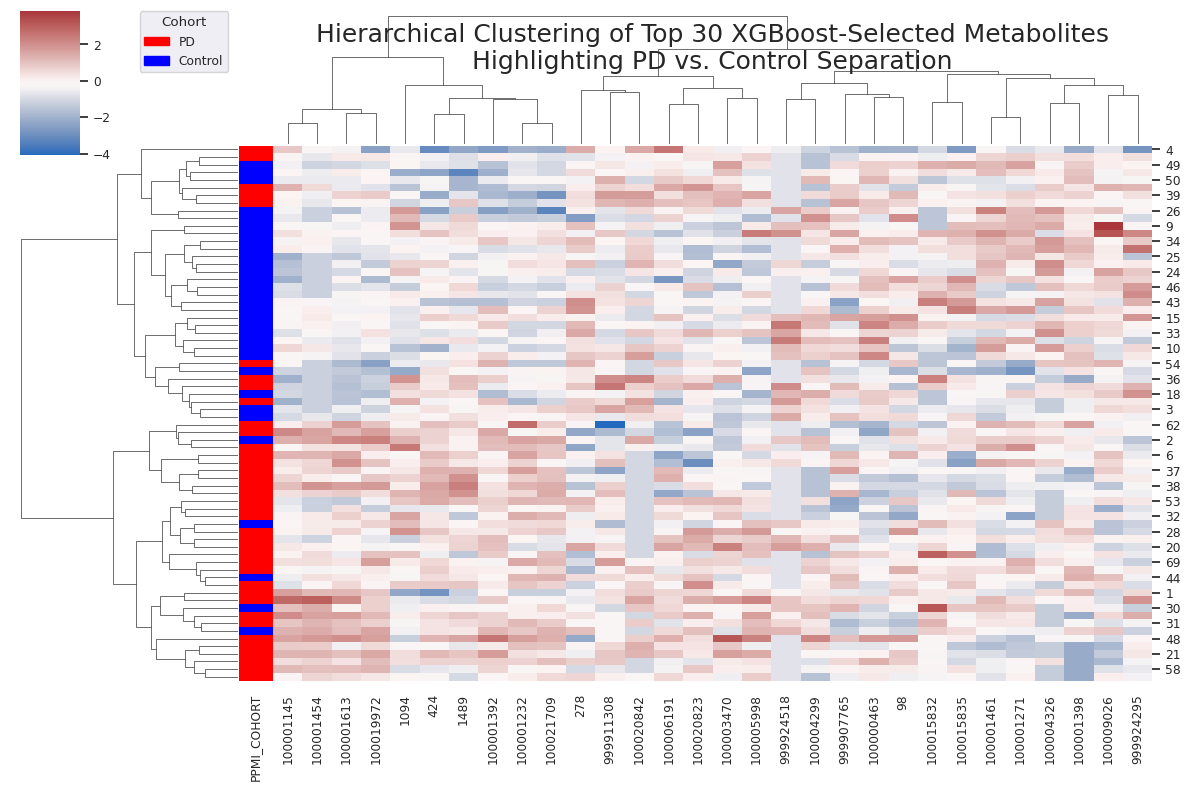

In [27]:
import matplotlib.patches as mpatches

# After your clustermap
sns.set(font_scale=0.8)
g = sns.clustermap(
    cluster_df_scaled,
    method='ward',
    metric='euclidean',
    row_colors=row_colors,
    figsize=(12, 8),
    cmap='vlag',
    dendrogram_ratio=(0.2, 0.2),
    cbar_pos=(0.02, 0.8, 0.05, 0.18)
)

# Legend patches
red_patch = mpatches.Patch(color='red', label='PD')
blue_patch = mpatches.Patch(color='blue', label='Control')

# ✅ Adjust the legend position (move far right)
plt.legend(handles=[red_patch, blue_patch],
           loc='upper left',
           bbox_to_anchor=(2.0, 1.0),  # Adjust as needed
           borderaxespad=0.,
           title='Cohort')

# plt.title('Metabolite Clustering (Top 30 XGBoost Features) Highlights PD vs. Control Cohort Separation', pad=100)
#plt.title(
#    "Hierarchical Clustering of Top 30 XGBoost-Selected Metabolites\nHighlighting PD vs. Control Separation",
#    fontsize=18,
#    loc='center',
#    pad=120
#)

# ✅ Set title centered on the heatmap
g.ax_heatmap.set_title(
    "Hierarchical Clustering of Top 30 XGBoost-Selected Metabolites\nHighlighting PD vs. Control Separation",
    fontsize=18,
    pad=55
)
plt.show()

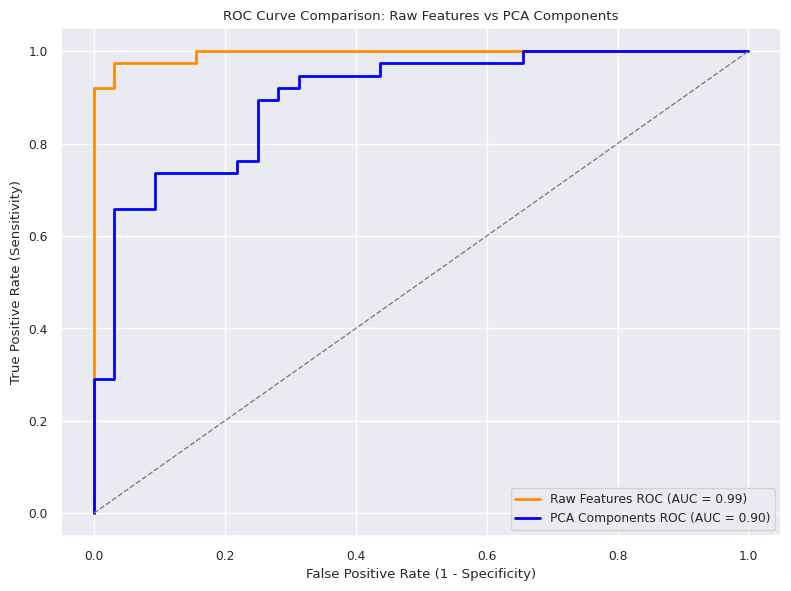

In [30]:
# ROC Using Raw Top 30 Metabolite Features (X_selected)
# ROC Using PCA Components (PC1, PC2)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ===================
# Train on Raw Features (X_selected)
X_selected = pd.read_csv('/content/drive/MyDrive/CSC-587/Milestone/Data/top30_xgboost_metabolites.csv')
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_selected, y_bl)  # Assuming y_bl is 0=Control, 1=PD
y_prob_raw = model_raw.predict_proba(X_selected)[:, 1]

fpr_raw, tpr_raw, _ = roc_curve(y_bl, y_prob_raw)
roc_auc_raw = auc(fpr_raw, tpr_raw)

# ===================
# Train on PCA Components
pca_features = pca_df[['PC1', 'PC2']]  # If you've already created pca_df
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(pca_features, y_bl)
y_prob_pca = model_pca.predict_proba(pca_features)[:, 1]

fpr_pca, tpr_pca, _ = roc_curve(y_bl, y_prob_pca)
roc_auc_pca = auc(fpr_pca, tpr_pca)

# ===================
# Plot Both ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, color='darkorange', lw=2, label=f'Raw Features ROC (AUC = {roc_auc_raw:.2f})')
plt.plot(fpr_pca, tpr_pca, color='blue', lw=2, label=f'PCA Components ROC (AUC = {roc_auc_pca:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve Comparison: Raw Features vs PCA Components')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()